In [2]:
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd

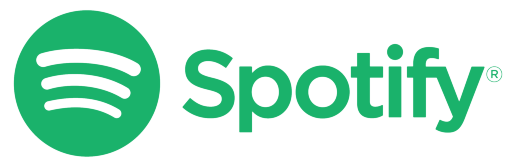

In [3]:
image = Image.open("Spotify_Logo.png")
plt.imshow(image)
plt.axis('off')
plt.show()





## Play List selected: "37i9dQZF1DX4o1oenSJRJd"

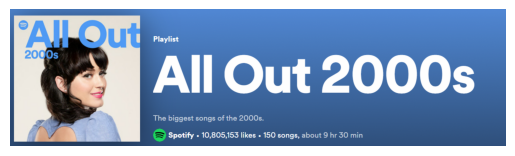

In [4]:
image = Image.open("Playlist.png")
plt.imshow(image)
plt.axis('off')
plt.show()


## ➡️ Loading credentials from another config file

In [5]:
import config

## ➡️Starting with Spotify API

In [6]:
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))


results = sp.search(q="All out 2000s",limit=5,market="GB")
results


{'tracks': {'href': 'https://api.spotify.com/v1/search?query=All+out+2000s&type=track&market=GB&offset=0&limit=5',
  'items': [{'album': {'album_type': 'compilation',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/0LyfQWJT6nXafLPZqxe9Of'},
       'href': 'https://api.spotify.com/v1/artists/0LyfQWJT6nXafLPZqxe9Of',
       'id': '0LyfQWJT6nXafLPZqxe9Of',
       'name': 'Various Artists',
       'type': 'artist',
       'uri': 'spotify:artist:0LyfQWJT6nXafLPZqxe9Of'}],
     'external_urls': {'spotify': 'https://open.spotify.com/album/3xCR5Ld0s2k0rK15PnaN98'},
     'href': 'https://api.spotify.com/v1/albums/3xCR5Ld0s2k0rK15PnaN98',
     'id': '3xCR5Ld0s2k0rK15PnaN98',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/ab67616d0000b273338cd0ae44e7c9b9aa702f3f',
       'width': 640},
      {'height': 300,
       'url': 'https://i.scdn.co/image/ab67616d00001e02338cd0ae44e7c9b9aa702f3f',
       'width': 300},
      {'height': 64,
       'url

## ➡️Embedded track player

In [25]:
from IPython.display import IFrame

def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [26]:
play_song("37i9dQZF1DX4o1oenSJRJd")

## ➡️ Get Dictionary of Songs from Selected List

Using the function get Playlist_Track

In [24]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [25]:
get_playlist_tracks('spotify','37i9dQZF1DX4o1oenSJRJd')

[{'added_at': '2022-12-22T14:09:02Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
   'href': 'https://api.spotify.com/v1/users/',
   'id': '',
   'type': 'user',
   'uri': 'spotify:user:'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6jJ0s89eD6GaHleKKya26X'},
      'href': 'https://api.spotify.com/v1/artists/6jJ0s89eD6GaHleKKya26X',
      'id': '6jJ0s89eD6GaHleKKya26X',
      'name': 'Katy Perry',
      'type': 'artist',
      'uri': 'spotify:artist:6jJ0s89eD6GaHleKKya26X'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/0r2BUyPTmpbfuz4rR39mLl'},
    'href': 'https://api.spotify.com/v1/albums/0r2BUyPTmpbfuz4rR39mLl',
    'id': '0r2BUyPTmpbfuz4rR39mLl',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273cd3978ebe35d93a07249b97f',
      'width': 640},
     {'height': 300,
     

In [26]:
selected_playlist = get_playlist_tracks('spotify','37i9dQZF1DX4o1oenSJRJd')

In [27]:
selected_playlist

[{'added_at': '2022-12-22T14:09:02Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
   'href': 'https://api.spotify.com/v1/users/',
   'id': '',
   'type': 'user',
   'uri': 'spotify:user:'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/6jJ0s89eD6GaHleKKya26X'},
      'href': 'https://api.spotify.com/v1/artists/6jJ0s89eD6GaHleKKya26X',
      'id': '6jJ0s89eD6GaHleKKya26X',
      'name': 'Katy Perry',
      'type': 'artist',
      'uri': 'spotify:artist:6jJ0s89eD6GaHleKKya26X'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/0r2BUyPTmpbfuz4rR39mLl'},
    'href': 'https://api.spotify.com/v1/albums/0r2BUyPTmpbfuz4rR39mLl',
    'id': '0r2BUyPTmpbfuz4rR39mLl',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273cd3978ebe35d93a07249b97f',
      'width': 640},
     {'height': 300,
     

## ➡️ Get ID of Songs (Find a Path)

In [28]:
# 1. Creating a empty list

id_songs_from_playlist = []

for i in selected_playlist:
    id_songs_from_playlist.append(i['track']['id'])

In [29]:
id_songs_from_playlist

['0iGckQFyv6svOfAbAY9aWJ',
 '3AJwUDP919kvQ9QcozQPxg',
 '7lQ8MOhq6IN2w8EYcFNSUk',
 '60a0Rd6pjrkxjPbaKzXjfq',
 '5TRPicyLGbAF2LGBFbHGvO',
 '003vvx7Niy0yvhvHt4a68B',
 '3ZFTkvIE7kyPt6Nu3PEa7V',
 '14iN3o8ptQ8cFVZTEmyQRV',
 '4zOfy9kqJlG0ZXvcaSh4gv',
 '3yfqSUWxFvZELEM4PmlwIR',
 '2nLtzopw4rPReszdYBJU6h',
 '228BxWXUYQPJrJYHDLOHkj',
 '4ZMJshw6UOvaTWWThYtEoW',
 '3dPQuX8Gs42Y7b454ybpMR',
 '0d28khcov6AiegSCpG5TuT',
 '7w87IxuO7BDcJ3YUqCyMTT',
 '455AfCsOhhLPRc68sE01D8',
 '75JFxkI2RXiU7L9VXzMkle',
 '4xkOaSrkexMciUUogZKVTS',
 '2gam98EZKrF9XuOkU13ApN',
 '49FYlytm3dAAraYgpoJZux',
 '0COqiPhxzoWICwFCS4eZcp',
 '4HlFJV71xXKIGcU3kRyttv',
 '5rb9QrpfcKFHM1EUbSIurX',
 '360UM2DaiHZPRu0EsrOvMp',
 '2PpruBYCo4H7WOBJ7Q2EwM',
 '0HPD5WQqrq7wPWR7P7Dw1i',
 '7LVHVU3tWfcxj5aiPFEW4Q',
 '3ZOEytgrvLwQaqXreDs2Jx',
 '2igwFfvr1OAGX9SKDCPBwO',
 '3UmaczJpikHgJFyBTAJVoz',
 '2kQuhkFX7uSVepCD3h29g5',
 '5A1FmxbYVRZKy4nc16MAue',
 '0SiywuOBRcynK0uKGWdCnn',
 '6GG73Jik4jUlQCkKg9JuGO',
 '0I3q5fE6wg7LIfHGngUTnV',
 '0BCPKOYdS2jbQ8iyB56Zns',
 

## ➡️ Get AF of Songs 

In [30]:
song_list =[]
for i in id_songs_from_playlist:
    song_list.append(sp.audio_features(i)[0])

In [31]:
song_list

[{'danceability': 0.706,
  'energy': 0.841,
  'key': 7,
  'loudness': -3.956,
  'mode': 1,
  'speechiness': 0.0418,
  'acousticness': 7.95e-05,
  'instrumentalness': 0,
  'liveness': 0.0688,
  'valence': 0.861,
  'tempo': 132.032,
  'type': 'audio_features',
  'id': '0iGckQFyv6svOfAbAY9aWJ',
  'uri': 'spotify:track:0iGckQFyv6svOfAbAY9aWJ',
  'track_href': 'https://api.spotify.com/v1/tracks/0iGckQFyv6svOfAbAY9aWJ',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0iGckQFyv6svOfAbAY9aWJ',
  'duration_ms': 220227,
  'time_signature': 4},
 {'danceability': 0.429,
  'energy': 0.661,
  'key': 11,
  'loudness': -7.227,
  'mode': 1,
  'speechiness': 0.0281,
  'acousticness': 0.00239,
  'instrumentalness': 0.000121,
  'liveness': 0.234,
  'valence': 0.285,
  'tempo': 173.372,
  'type': 'audio_features',
  'id': '3AJwUDP919kvQ9QcozQPxg',
  'uri': 'spotify:track:3AJwUDP919kvQ9QcozQPxg',
  'track_href': 'https://api.spotify.com/v1/tracks/3AJwUDP919kvQ9QcozQPxg',
  'analysis_url': 'http

## ➡️ Creating a DF

In [32]:
selected_playlist_df = pd.DataFrame(song_list)

In [33]:
selected_playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.706,0.841,7,-3.956,1,0.0418,0.000079,0.000000,0.0688,0.861,132.032,audio_features,0iGckQFyv6svOfAbAY9aWJ,spotify:track:0iGckQFyv6svOfAbAY9aWJ,https://api.spotify.com/v1/tracks/0iGckQFyv6sv...,https://api.spotify.com/v1/audio-analysis/0iGc...,220227,4
1,0.429,0.661,11,-7.227,1,0.0281,0.002390,0.000121,0.2340,0.285,173.372,audio_features,3AJwUDP919kvQ9QcozQPxg,spotify:track:3AJwUDP919kvQ9QcozQPxg,https://api.spotify.com/v1/tracks/3AJwUDP919kv...,https://api.spotify.com/v1/audio-analysis/3AJw...,266773,4
2,0.908,0.669,7,-2.827,1,0.0738,0.002860,0.000000,0.2370,0.662,112.238,audio_features,7lQ8MOhq6IN2w8EYcFNSUk,spotify:track:7lQ8MOhq6IN2w8EYcFNSUk,https://api.spotify.com/v1/tracks/7lQ8MOhq6IN2...,https://api.spotify.com/v1/audio-analysis/7lQ8...,290320,4
3,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.2090,0.400,105.143,audio_features,60a0Rd6pjrkxjPbaKzXjfq,spotify:track:60a0Rd6pjrkxjPbaKzXjfq,https://api.spotify.com/v1/tracks/60a0Rd6pjrkx...,https://api.spotify.com/v1/audio-analysis/60a0...,216880,4
4,0.639,0.628,6,-7.578,0,0.0399,0.038100,0.000000,0.3860,0.430,90.482,audio_features,5TRPicyLGbAF2LGBFbHGvO,spotify:track:5TRPicyLGbAF2LGBFbHGvO,https://api.spotify.com/v1/tracks/5TRPicyLGbAF...,https://api.spotify.com/v1/audio-analysis/5TRP...,237507,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.699,0.812,0,-6.005,1,0.0377,0.016400,0.000763,0.1050,0.662,138.185,audio_features,4dyx5SzxPPaD8xQIid5Wjj,spotify:track:4dyx5SzxPPaD8xQIid5Wjj,https://api.spotify.com/v1/tracks/4dyx5SzxPPaD...,https://api.spotify.com/v1/audio-analysis/4dyx...,276693,4
146,0.597,0.837,10,-6.518,1,0.3750,0.004270,0.001150,0.8390,0.447,126.342,audio_features,1xNcBAoUw8Hz6LqK2jt4Ff,spotify:track:1xNcBAoUw8Hz6LqK2jt4Ff,https://api.spotify.com/v1/tracks/1xNcBAoUw8Hz...,https://api.spotify.com/v1/audio-analysis/1xNc...,171360,4
147,0.822,0.739,1,-4.541,0,0.0311,0.026400,0.000043,0.1810,0.745,118.992,audio_features,2x7MyWybabEz6Y6wvHuwGE,spotify:track:2x7MyWybabEz6Y6wvHuwGE,https://api.spotify.com/v1/tracks/2x7MyWybabEz...,https://api.spotify.com/v1/audio-analysis/2x7M...,241933,4
148,0.687,0.745,6,-4.432,1,0.0379,0.178000,0.000016,0.1110,0.435,129.966,audio_features,1GEBsLDvJGw7kviySRI6GX,spotify:track:1GEBsLDvJGw7kviySRI6GX,https://api.spotify.com/v1/tracks/1GEBsLDvJGw7...,https://api.spotify.com/v1/audio-analysis/1GEB...,232120,4


Doing the same but whit another playlist

ID: 6BROuMbBjhhOzP1gAuiiit

In [34]:
salsa_playlist= get_playlist_tracks('spotify','6BROuMbBjhhOzP1gAuiiit')

In [35]:
salsa_playlist

[{'added_at': '2020-11-03T00:22:45Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/zb4tsvstmlfz99b7fak0f16m9'},
   'href': 'https://api.spotify.com/v1/users/zb4tsvstmlfz99b7fak0f16m9',
   'id': 'zb4tsvstmlfz99b7fak0f16m9',
   'type': 'user',
   'uri': 'spotify:user:zb4tsvstmlfz99b7fak0f16m9'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4wLXwxDeWQ8mtUIRPxGiD6'},
      'href': 'https://api.spotify.com/v1/artists/4wLXwxDeWQ8mtUIRPxGiD6',
      'id': '4wLXwxDeWQ8mtUIRPxGiD6',
      'name': 'Marc Anthony',
      'type': 'artist',
      'uri': 'spotify:artist:4wLXwxDeWQ8mtUIRPxGiD6'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/4O3yvEN5II2yKWKBPtDLD7'},
    'href': 'https://api.spotify.com/v1/albums/4O3yvEN5II2yKWKBPtDLD7',
    'id': '4O3yvEN5II2yKWKBPtDLD7',
    'images': [{'height': 640,
      'url': 'https://i.sc

id

In [36]:
salsa_id =[]

for i in salsa_playlist:
    
    salsa_id.append(i["track"]["id"])
    
    

In [37]:
salsa_id

['3yEtuhGR8jOtusa29jWrhG',
 '2q9udNV9NK0BL3q9p6TLxf',
 '3QHMxEOAGD51PDlbFPHLyJ',
 '6ydEhrdfzhI29D2NBAqUY1',
 '1bqHDCBs1wtB7VkAJ9NHjB',
 '5YfqVqJwjxiyhxvofbCnHp',
 '1HWbpfmzt1YplLceHgirCv',
 '5XWfwjzFNl2pTB737fx7qr',
 '5gKOs03E43d3TGZYzelQsY',
 '7mIlFG1PKmqfTsaT48dEU4',
 '2ozSogNm6z9G2Uv6a9iji4',
 '1GT0Q2ZTeKtIBueYKr4vhr',
 '2URe3fGSKuCh8v0d49lsNU',
 '7nDIflSHQXzaa8zupxwv3U',
 '0rBmvZ4ftXKpxsocjsbAun',
 '0xgdMUInG692P5WjBElwvR',
 '5WyX397vZTvYQwSrylCka0',
 '47TyfLrGhYHHyyQWk64d0M',
 '2QOA0E6cuORpCD6gfKCoRk',
 '0bUgIkg2Nyoqon5ypj2sUt',
 '0Tu9FmT2ATnzwTQm9TcnGu',
 '0bXUbrHbHOcvyv1Fmurmfq',
 '19TJqGoUMbptYQ1Lwfd2Ri',
 '2naqSVQHgiaoEpxtkVOhmK',
 '7nflSbrgBCitUnW4psdR7a',
 '2wBnlC3DdW9s1UnFlAWCdI',
 '5irJ9qqvXp2hPpRqAhqWiS',
 '4RCzKrRP5OrB4bvINizTGf',
 '4UHRMwbbiZ7tkeEkhyN7iB',
 '5N8HRh3pKXakJrdxQKMi1j',
 '41LiGcvaTkXHyPjfsxKvWv',
 '4zOZQdgs7nSjMkqB7keSM5',
 '6SZrhuLGjIzsliOLEG7Y7O',
 '2naqSVQHgiaoEpxtkVOhmK',
 '2BOcua9pjhKuVtgN40AAHX',
 '2kBgJXGbVA6WcA40IFA9KF',
 '00Ro1lnV3V6i87aY4t8Q43',
 

AF of the songs

In [38]:
salsa_af_song =[]

for i in salsa_id:
    salsa_af_song.append(sp.audio_features(i)[0])
    

In [52]:
salsa_af_song

[{'danceability': 0.691,
  'energy': 0.658,
  'key': 0,
  'loudness': -6.496,
  'mode': 1,
  'speechiness': 0.0359,
  'acousticness': 0.398,
  'instrumentalness': 4.58e-05,
  'liveness': 0.112,
  'valence': 0.617,
  'tempo': 97.68,
  'type': 'audio_features',
  'id': '3yEtuhGR8jOtusa29jWrhG',
  'uri': 'spotify:track:3yEtuhGR8jOtusa29jWrhG',
  'track_href': 'https://api.spotify.com/v1/tracks/3yEtuhGR8jOtusa29jWrhG',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3yEtuhGR8jOtusa29jWrhG',
  'duration_ms': 300160,
  'time_signature': 4},
 {'danceability': 0.805,
  'energy': 0.757,
  'key': 8,
  'loudness': -7.46,
  'mode': 1,
  'speechiness': 0.0355,
  'acousticness': 0.279,
  'instrumentalness': 0.000839,
  'liveness': 0.101,
  'valence': 0.973,
  'tempo': 102.14,
  'type': 'audio_features',
  'id': '2q9udNV9NK0BL3q9p6TLxf',
  'uri': 'spotify:track:2q9udNV9NK0BL3q9p6TLxf',
  'track_href': 'https://api.spotify.com/v1/tracks/2q9udNV9NK0BL3q9p6TLxf',
  'analysis_url': 'https://

creating the df

In [39]:
salsa_playlist_df = pd.DataFrame(salsa_af_song)

In [40]:
salsa_playlist_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.691,0.658,0,-6.496,1,0.0359,0.398,0.000046,0.1120,0.617,97.680,audio_features,3yEtuhGR8jOtusa29jWrhG,spotify:track:3yEtuhGR8jOtusa29jWrhG,https://api.spotify.com/v1/tracks/3yEtuhGR8jOt...,https://api.spotify.com/v1/audio-analysis/3yEt...,300160,4
1,0.805,0.757,8,-7.460,1,0.0355,0.279,0.000839,0.1010,0.973,102.140,audio_features,2q9udNV9NK0BL3q9p6TLxf,spotify:track:2q9udNV9NK0BL3q9p6TLxf,https://api.spotify.com/v1/tracks/2q9udNV9NK0B...,https://api.spotify.com/v1/audio-analysis/2q9u...,271031,4
2,0.656,0.877,0,-3.231,0,0.0342,0.345,0.000000,0.3490,0.894,105.018,audio_features,3QHMxEOAGD51PDlbFPHLyJ,spotify:track:3QHMxEOAGD51PDlbFPHLyJ,https://api.spotify.com/v1/tracks/3QHMxEOAGD51...,https://api.spotify.com/v1/audio-analysis/3QHM...,252347,4
3,0.600,0.633,4,-7.507,0,0.0667,0.741,0.073600,0.0478,0.966,120.627,audio_features,6ydEhrdfzhI29D2NBAqUY1,spotify:track:6ydEhrdfzhI29D2NBAqUY1,https://api.spotify.com/v1/tracks/6ydEhrdfzhI2...,https://api.spotify.com/v1/audio-analysis/6ydE...,291947,4
4,0.481,0.787,4,-4.218,0,0.0926,0.381,0.000000,0.1120,0.734,182.279,audio_features,1bqHDCBs1wtB7VkAJ9NHjB,spotify:track:1bqHDCBs1wtB7VkAJ9NHjB,https://api.spotify.com/v1/tracks/1bqHDCBs1wtB...,https://api.spotify.com/v1/audio-analysis/1bqH...,306453,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0.752,0.612,5,-8.236,0,0.0525,0.589,0.000000,0.3220,0.954,109.689,audio_features,73Wi69BqzsFX1QIAD144qN,spotify:track:73Wi69BqzsFX1QIAD144qN,https://api.spotify.com/v1/tracks/73Wi69BqzsFX...,https://api.spotify.com/v1/audio-analysis/73Wi...,289959,4
68,0.854,0.965,3,-3.875,0,0.0756,0.349,0.000000,0.0721,0.894,130.439,audio_features,1UCDUtm50LQAgCxROVYaQ2,spotify:track:1UCDUtm50LQAgCxROVYaQ2,https://api.spotify.com/v1/tracks/1UCDUtm50LQA...,https://api.spotify.com/v1/audio-analysis/1UCD...,257489,4
69,0.909,0.816,0,-5.059,1,0.1050,0.254,0.000000,0.0852,0.891,111.851,audio_features,28fHEGFHiQGiP7uQUGxInK,spotify:track:28fHEGFHiQGiP7uQUGxInK,https://api.spotify.com/v1/tracks/28fHEGFHiQGi...,https://api.spotify.com/v1/audio-analysis/28fH...,223887,4
70,0.425,0.823,8,-5.628,1,0.0458,0.385,0.000000,0.0882,0.847,92.118,audio_features,3WSASuEFLKfnGbn3ZelPdu,spotify:track:3WSASuEFLKfnGbn3ZelPdu,https://api.spotify.com/v1/tracks/3WSASuEFLKfn...,https://api.spotify.com/v1/audio-analysis/3WSA...,228250,4


90 songs: 37i9dQZF1DXbTxeAdrVG2l

In [47]:
nineties_playlist= get_playlist_tracks('spotify','37i9dQZF1DXbTxeAdrVG2l')

nineties_id =[]

for i in nineties_playlist:
    
    nineties_id.append(i["track"]["id"])
    
    
nineties_af_song =[]

for i in nineties_id:
    nineties_af_song.append(sp.audio_features(i)[0])
    
    

nineties_playlist_df = pd.DataFrame(nineties_af_song)

80 songs:0DXdVAOYnOwHy2wnY4WNTQ

In [48]:
eightees_playlist= get_playlist_tracks('spotify','37i9dQZF1DXbTxeAdrVG2l')

eightees_id =[]

for i in eightees_playlist:
    
    eightees_id.append(i["track"]["id"])
    
    
eightees_af_song =[]

for i in eightees_id:
    eightees_af_song.append(sp.audio_features(i)[0])

eightees_playlist_df = pd.DataFrame(eightees_af_song)

70 songs:37i9dQZF1DWTJ7xPn4vNaz

In [49]:
seventies_playlist= get_playlist_tracks('spotify','37i9dQZF1DWTJ7xPn4vNaz')

seventies_id =[]

for i in seventies_playlist:
    
    seventies_id.append(i["track"]["id"])
    
    
seventies_af_song =[]

for i in seventies_id:
    seventies_af_song.append(sp.audio_features(i)[0])

seventies_playlist_df = pd.DataFrame(seventies_af_song)

60 songs: 37i9dQZF1DXaKIA8E7WcJj

In [50]:
sixties_playlist= get_playlist_tracks('spotify','37i9dQZF1DXaKIA8E7WcJj')

sixties_id =[]

for i in sixties_playlist:
    
    sixties_id.append(i["track"]["id"])
    
    
sixties_af_song =[]

for i in sixties_id:
    sixties_af_song.append(sp.audio_features(i)[0])

sixties_playlist_df = pd.DataFrame(sixties_af_song)

50 songs: 37i9dQZF1DWSV3Tk4GO2fq

In [52]:
fifties_playlist= get_playlist_tracks('spotify',"37i9dQZF1DWSV3Tk4GO2fq")

fifties_id =[]

for i in fifties_playlist:
    
    fifties_id.append(i["track"]["id"])
    
    
fifties_af_song =[]

for i in fifties_id:
    fifties_af_song.append(sp.audio_features(i)[0])

fifties_playlist_df = pd.DataFrame(fifties_af_song)

Rock music: 4KMTPlCz10UdmaJ3RGsFUd

In [53]:
rock_playlist= get_playlist_tracks('spotify',"37i9dQZF1DWSV3Tk4GO2fq")

rock_id =[]

for i in rock_playlist:
    
    rock_id.append(i["track"]["id"])
    
    
rock_af_song =[]

for i in rock_id:
    rock_af_song.append(sp.audio_features(i)[0])

rock_playlist_df = pd.DataFrame(rock_af_song)

# ------------------------------------------------------------------------------------------

In [8]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    audio_list = []
    for i in range(len(tracks)):
            audio_list.append(sp.audio_features(tracks[i]["track"]["id"])[0])
    audio_df = pd.DataFrame(audio_list)
    return audio_df

In [9]:
df = get_playlist_tracks("Classi Music", "1h0CEZCm6IbFTbxThn6Xcs")

In [10]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.213,0.06560,7,-24.810,1,0.0467,0.992,0.969000,0.0699,0.0384,65.023,audio_features,3U8Fx7zNTQrctytkj6Gqgd,spotify:track:3U8Fx7zNTQrctytkj6Gqgd,https://api.spotify.com/v1/tracks/3U8Fx7zNTQrc...,https://api.spotify.com/v1/audio-analysis/3U8F...,150147,3
1,0.330,0.00357,3,-33.142,1,0.0339,0.995,0.953000,0.0989,0.1210,100.741,audio_features,6MzbO6YS0M6tjwT93hjAl0,spotify:track:6MzbO6YS0M6tjwT93hjAl0,https://api.spotify.com/v1/tracks/6MzbO6YS0M6t...,https://api.spotify.com/v1/audio-analysis/6Mzb...,216213,3
2,0.368,0.00363,1,-36.759,1,0.0350,0.993,0.922000,0.1370,0.0850,69.363,audio_features,1L4NadMj3Jj7YgGaikyhfr,spotify:track:1L4NadMj3Jj7YgGaikyhfr,https://api.spotify.com/v1/tracks/1L4NadMj3Jj7...,https://api.spotify.com/v1/audio-analysis/1L4N...,254000,3
3,0.320,0.00501,1,-33.366,1,0.0455,0.993,0.919000,0.0618,0.0383,68.947,audio_features,3hCPh4oVVjaM8tv9sFH8cx,spotify:track:3hCPh4oVVjaM8tv9sFH8cx,https://api.spotify.com/v1/tracks/3hCPh4oVVjaM...,https://api.spotify.com/v1/audio-analysis/3hCP...,294960,5
4,0.701,0.34100,1,-12.260,0,0.0418,0.499,0.903000,0.3590,0.1630,105.513,audio_features,5xbuJuQsTVheVZvX2AJVIv,spotify:track:5xbuJuQsTVheVZvX2AJVIv,https://api.spotify.com/v1/tracks/5xbuJuQsTVhe...,https://api.spotify.com/v1/audio-analysis/5xbu...,151507,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.489,0.01410,2,-23.312,0,0.0453,0.994,0.898000,0.1090,0.2720,127.461,audio_features,3SokfTeWt84ZeUenQUPzAX,spotify:track:3SokfTeWt84ZeUenQUPzAX,https://api.spotify.com/v1/tracks/3SokfTeWt84Z...,https://api.spotify.com/v1/audio-analysis/3Sok...,194667,4
193,0.273,0.00516,4,-27.926,0,0.0397,0.994,0.900000,0.0955,0.1360,91.405,audio_features,73cFlYu63RLX1qn9qzMXiJ,spotify:track:73cFlYu63RLX1qn9qzMXiJ,https://api.spotify.com/v1/tracks/73cFlYu63RLX...,https://api.spotify.com/v1/audio-analysis/73cF...,176187,4
194,0.130,0.08600,10,-21.920,1,0.0373,0.932,0.912000,0.1080,0.0375,90.223,audio_features,3Sy6wgTNEp6vSgLs4EyXAf,spotify:track:3Sy6wgTNEp6vSgLs4EyXAf,https://api.spotify.com/v1/tracks/3Sy6wgTNEp6v...,https://api.spotify.com/v1/audio-analysis/3Sy6...,391160,4
195,0.176,0.00600,5,-42.238,1,0.0384,0.899,0.000032,0.1050,0.0383,71.477,audio_features,4wudbbceOZKjRlhTtbHvAs,spotify:track:4wudbbceOZKjRlhTtbHvAs,https://api.spotify.com/v1/tracks/4wudbbceOZKj...,https://api.spotify.com/v1/audio-analysis/4wud...,636000,3


In [11]:
df = pd.concat([df, get_playlist_tracks('French Music', '6TxuoHMx9qLTePZGS1CasY')], ignore_index=True)

In [12]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.213,0.06560,7,-24.810,1,0.0467,0.9920,0.969000,0.0699,0.0384,65.023,audio_features,3U8Fx7zNTQrctytkj6Gqgd,spotify:track:3U8Fx7zNTQrctytkj6Gqgd,https://api.spotify.com/v1/tracks/3U8Fx7zNTQrc...,https://api.spotify.com/v1/audio-analysis/3U8F...,150147,3
1,0.330,0.00357,3,-33.142,1,0.0339,0.9950,0.953000,0.0989,0.1210,100.741,audio_features,6MzbO6YS0M6tjwT93hjAl0,spotify:track:6MzbO6YS0M6tjwT93hjAl0,https://api.spotify.com/v1/tracks/6MzbO6YS0M6t...,https://api.spotify.com/v1/audio-analysis/6Mzb...,216213,3
2,0.368,0.00363,1,-36.759,1,0.0350,0.9930,0.922000,0.1370,0.0850,69.363,audio_features,1L4NadMj3Jj7YgGaikyhfr,spotify:track:1L4NadMj3Jj7YgGaikyhfr,https://api.spotify.com/v1/tracks/1L4NadMj3Jj7...,https://api.spotify.com/v1/audio-analysis/1L4N...,254000,3
3,0.320,0.00501,1,-33.366,1,0.0455,0.9930,0.919000,0.0618,0.0383,68.947,audio_features,3hCPh4oVVjaM8tv9sFH8cx,spotify:track:3hCPh4oVVjaM8tv9sFH8cx,https://api.spotify.com/v1/tracks/3hCPh4oVVjaM...,https://api.spotify.com/v1/audio-analysis/3hCP...,294960,5
4,0.701,0.34100,1,-12.260,0,0.0418,0.4990,0.903000,0.3590,0.1630,105.513,audio_features,5xbuJuQsTVheVZvX2AJVIv,spotify:track:5xbuJuQsTVheVZvX2AJVIv,https://api.spotify.com/v1/tracks/5xbuJuQsTVhe...,https://api.spotify.com/v1/audio-analysis/5xbu...,151507,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,0.689,0.64100,8,-7.133,0,0.1030,0.3120,0.000000,0.0641,0.5090,149.072,audio_features,1zNGngJpT00C7fMRTwcJhQ,spotify:track:1zNGngJpT00C7fMRTwcJhQ,https://api.spotify.com/v1/tracks/1zNGngJpT00C...,https://api.spotify.com/v1/audio-analysis/1zNG...,175253,4
309,0.695,0.63000,8,-7.160,0,0.0350,0.2290,0.000000,0.1180,0.5500,130.968,audio_features,3D29kjUyWxsT3jUUTtARVQ,spotify:track:3D29kjUyWxsT3jUUTtARVQ,https://api.spotify.com/v1/tracks/3D29kjUyWxsT...,https://api.spotify.com/v1/audio-analysis/3D29...,240413,4
310,0.834,0.62400,9,-8.565,0,0.0838,0.0729,0.000000,0.1060,0.8310,115.981,audio_features,63siBeZzxXVaY0uASns1V2,spotify:track:63siBeZzxXVaY0uASns1V2,https://api.spotify.com/v1/tracks/63siBeZzxXVa...,https://api.spotify.com/v1/audio-analysis/63si...,232373,4
311,0.758,0.59900,4,-5.990,0,0.0877,0.5700,0.000001,0.1290,0.5570,129.960,audio_features,4ZpIuzx91EAPK3VimONbfB,spotify:track:4ZpIuzx91EAPK3VimONbfB,https://api.spotify.com/v1/tracks/4ZpIuzx91EAP...,https://api.spotify.com/v1/audio-analysis/4ZpI...,219188,4


In [13]:
df = pd.concat([df, get_playlist_tracks('50s', '37i9dQZF1DWSV3Tk4GO2fq')], ignore_index=True)

In [14]:
df = pd.concat([df, get_playlist_tracks('60s', '37i9dQZF1DXaKIA8E7WcJj')], ignore_index=True)

In [15]:
df = pd.concat([df, get_playlist_tracks('70s', '37i9dQZF1DWTJ7xPn4vNaz')], ignore_index=True)

In [16]:
df = pd.concat([df, get_playlist_tracks('80s', '0DXdVAOYnOwHy2wnY4WNTQ')], ignore_index=True)

In [17]:
df = pd.concat([df, get_playlist_tracks('90s', '37i9dQZF1DXbTxeAdrVG2l')], ignore_index=True)

In [18]:
df = pd.concat([df, get_playlist_tracks('2000s', '37i9dQZF1DX4o1oenSJRJd')], ignore_index=True)

In [19]:
df = pd.concat([df, get_playlist_tracks('MPB', '6u67VfC7voYC3PFazJixAK')], ignore_index=True)

In [20]:
df = pd.concat([df, get_playlist_tracks('Samba', '0ZDErN1LOLjCcJRnKr2BTA')], ignore_index=True)

In [21]:
df = pd.concat([df, get_playlist_tracks('Pop', '37i9dQZF1DX1ngEVM0lKrb')], ignore_index=True)

In [22]:
df = pd.concat([df, get_playlist_tracks('Pop 2000', '6mtYuOxzl58vSGnEDtZ9uB')], ignore_index=True)

In [23]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.213,0.06560,7,-24.810,1,0.0467,0.99200,0.969000,0.0699,0.0384,65.023,audio_features,3U8Fx7zNTQrctytkj6Gqgd,spotify:track:3U8Fx7zNTQrctytkj6Gqgd,https://api.spotify.com/v1/tracks/3U8Fx7zNTQrc...,https://api.spotify.com/v1/audio-analysis/3U8F...,150147,3
1,0.330,0.00357,3,-33.142,1,0.0339,0.99500,0.953000,0.0989,0.1210,100.741,audio_features,6MzbO6YS0M6tjwT93hjAl0,spotify:track:6MzbO6YS0M6tjwT93hjAl0,https://api.spotify.com/v1/tracks/6MzbO6YS0M6t...,https://api.spotify.com/v1/audio-analysis/6Mzb...,216213,3
2,0.368,0.00363,1,-36.759,1,0.0350,0.99300,0.922000,0.1370,0.0850,69.363,audio_features,1L4NadMj3Jj7YgGaikyhfr,spotify:track:1L4NadMj3Jj7YgGaikyhfr,https://api.spotify.com/v1/tracks/1L4NadMj3Jj7...,https://api.spotify.com/v1/audio-analysis/1L4N...,254000,3
3,0.320,0.00501,1,-33.366,1,0.0455,0.99300,0.919000,0.0618,0.0383,68.947,audio_features,3hCPh4oVVjaM8tv9sFH8cx,spotify:track:3hCPh4oVVjaM8tv9sFH8cx,https://api.spotify.com/v1/tracks/3hCPh4oVVjaM...,https://api.spotify.com/v1/audio-analysis/3hCP...,294960,5
4,0.701,0.34100,1,-12.260,0,0.0418,0.49900,0.903000,0.3590,0.1630,105.513,audio_features,5xbuJuQsTVheVZvX2AJVIv,spotify:track:5xbuJuQsTVheVZvX2AJVIv,https://api.spotify.com/v1/tracks/5xbuJuQsTVhe...,https://api.spotify.com/v1/audio-analysis/5xbu...,151507,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,0.767,0.68200,1,-5.020,1,0.0420,0.01130,0.000160,0.1040,0.8330,127.975,audio_features,0C4ejWmOTMv8vuYj85mf8m,spotify:track:0C4ejWmOTMv8vuYj85mf8m,https://api.spotify.com/v1/tracks/0C4ejWmOTMv8...,https://api.spotify.com/v1/audio-analysis/0C4e...,243533,4
1844,0.708,0.64100,7,-4.271,1,0.0336,0.20500,0.000000,0.0925,0.2530,113.082,audio_features,0lupJBVy4UQrvI4Oy3PvI7,spotify:track:0lupJBVy4UQrvI4Oy3PvI7,https://api.spotify.com/v1/tracks/0lupJBVy4UQr...,https://api.spotify.com/v1/audio-analysis/0lup...,268120,4
1845,0.754,0.65200,11,-4.924,0,0.0308,0.17400,0.000000,0.1130,0.4740,95.006,audio_features,1FvOiE8MGWB8MUCAPvro3h,spotify:track:1FvOiE8MGWB8MUCAPvro3h,https://api.spotify.com/v1/tracks/1FvOiE8MGWB8...,https://api.spotify.com/v1/audio-analysis/1FvO...,192013,4
1846,0.825,0.83200,5,-5.853,0,0.0403,0.00587,0.000789,0.1140,0.7130,122.021,audio_features,6nCDnzErqalOaIY3EJM8NK,spotify:track:6nCDnzErqalOaIY3EJM8NK,https://api.spotify.com/v1/tracks/6nCDnzErqalO...,https://api.spotify.com/v1/audio-analysis/6nCD...,220627,4


Organize df, drop some columns and add more playlist

In [24]:
df.to_csv("My_spotify_df.csv",index=False)